In [ ]:
#Customer Churn Prediction Using Artificial Neural Network (ANN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#load data

In [2]:
df=pd.read_csv('/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#remove cx id as it not required for  model building

In [4]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df2=df.drop('customerID',axis=1)

In [7]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Total charges in objext it should be in float lets convert it


# New Section

In [12]:
df2.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
pd.to_numeric(df2.TotalCharges,errors='coerce').isnull()#some rows are in blank

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [14]:
df2.shape

(7043, 20)

In [16]:
df2[pd.to_numeric(df2.TotalCharges,errors='coerce').isnull()]#in total charges some places are blank

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


remove blank places in total charges

In [17]:
df3=df2[df2.TotalCharges!=' ']

In [18]:
df3.shape

(7032, 20)

In [19]:
df3.TotalCharges=pd.to_numeric(df3.TotalCharges)#convert data type of Total charges

<ipython-input-19-da7a7d7c8793>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.TotalCharges=pd.to_numeric(df3.TotalCharges)


In [ ]:
#chk data type

In [20]:
df3.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [21]:
df3[df3.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [ ]:
#data visuliztion of

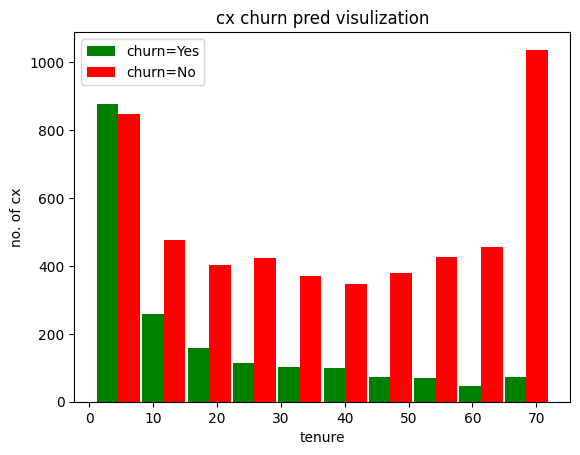

In [25]:
no=df3[df3.Churn=='No'].tenure
yes=df3[df3.Churn=='Yes'].tenure
plt.hist([yes,no],rwidth=0.95,color=['green','red'],label=['churn=Yes','churn=No'])
plt.xlabel('tenure')
plt.ylabel('no. of cx')
plt.title('cx churn pred visulization')

plt.legend()
plt.show()

 the green histogram (churn=Yes) is skewed toward lower tenure values, it suggests customers with shorter tenure are more likely to churn.
the red histogram (churn=No) is skewed toward higher tenure values, it indicates loyal customers tend to stay longer.

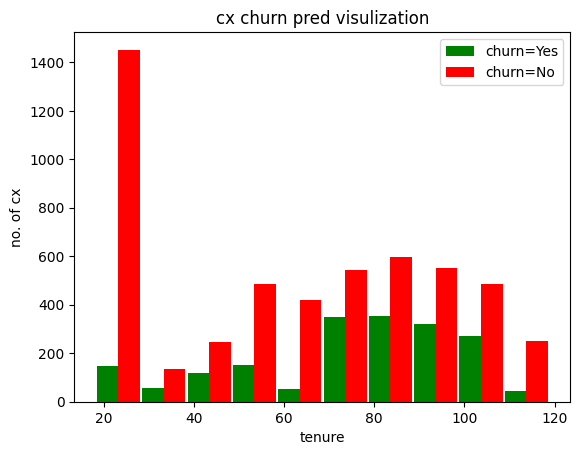

In [26]:
no=df3[df3.Churn=='No'].MonthlyCharges
yes=df3[df3.Churn=='Yes'].MonthlyCharges
plt.hist([yes,no],rwidth=0.95,color=['green','red'],label=['churn=Yes','churn=No'])
plt.xlabel('tenure')
plt.ylabel('no. of cx')
plt.title('cx churn pred visulization')

plt.legend()
plt.show()

the green histogram (churn=Yes) is skewed toward higher MonthlyCharges, it suggests customers with higher bills are more likely to churn.
the red histogram (churn=No) is skewed toward lower charges, it indicates loyal customers tend to have lower bills


In [ ]:
#print unique values as model can tke only numeric values

In [33]:
def unique_values(df1):
  for column in df3:
    if df3[column].dtype==object:
      print(f'{column}:{df3[column].unique()}')




In [34]:
unique_values(df3)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
#some columns have to chages as it mentioned no phone services can be changed as no

In [35]:
df3.replace('No phone service','No',inplace=True)
df3.replace('No internet service','No',inplace=True)

<ipython-input-35-51d938133030>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.replace('No phone service','No',inplace=True)
<ipython-input-35-51d938133030>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.replace('No internet service','No',inplace=True)


In [36]:
unique_values(df3)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [37]:
df3.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

convert yes or no to 1 and 0

In [41]:
yes_no_columns=[  'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling',
       'Churn']
for i in yes_no_columns:
        df3[i].replace({'Yes':1,'No':0},inplace=True)

<ipython-input-41-94620f1d7021>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3[i].replace({'Yes':1,'No':0},inplace=True)
<ipython-input-41-94620f1d7021>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3[i].replace({'Yes':1,'No':0},inplace=True)
<ipython-input-41-94620f1d7021>:7: SettingWith

In [42]:
unique_values(df3)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 0]
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [45]:
df3['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-45-2fb12035ce46>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['gender'].replace({'Female':1,'Male':0},inplace=True)
<ipython-input-45-2fb12035ce46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['gender'].replace({'Female':1,'Male':0},inplace=True)


In [46]:
unique_values(df3)

InternetService:['DSL' 'Fiber optic' 0]
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


on hot encoding to get dummies for categorical columns

In [47]:
df3=pd.get_dummies(data=df3,columns=['InternetService','Contract','PaymentMethod'])

In [48]:
df3.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [49]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,False,True,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,False,True,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,False,True,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False


In [52]:
df3.replace({True:1,False:0},inplace=True)

<ipython-input-52-6c607bb5727c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3.replace({True:1,False:0},inplace=True)


In [53]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [54]:
df3.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [ ]:
#data scalling

In [56]:
scales=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df3[scales]=scaler.fit_transform(df3[scales])

In [59]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


Model building

In [60]:
a=df3.drop('Churn',axis=1)
b=df3['Churn']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=6)

In [63]:
import tensorflow as tf
from tensorflow import keras

In [67]:
ann=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
ann.fit(a_train,b_train,epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6700 - loss: 0.5947
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7822 - loss: 0.4511
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7921 - loss: 0.4370
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7973 - loss: 0.4267
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7961 - loss: 0.4204
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8077 - loss: 0.4170
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8033 - loss: 0.4107
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8028 - loss: 0.4111
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8048 - loss: 0.4073
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8021 - loss: 0.4141
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8021 - loss: 0.4131
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [70]:
ann.evaluate(a_train,b_train)

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8352 - loss: 0.3497


[0.3481573462486267, 0.8396444320678711]

In [76]:
ann.evaluate(a_test,b_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8095 - loss: 0.4080


[0.43297603726387024, 0.7960199117660522]

In [72]:
pred=ann.predict(a_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [95]:
pred[:10]

array([[0.01455343],
       [0.00146157],
       [0.00755715],
       [0.00551639],
       [0.6419755 ],
       [0.02835371],
       [0.746243  ],
       [0.49324363],
       [0.00789023],
       [0.76226276]], dtype=float32)

In [79]:
y_pred = []
for element in pred:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [96]:
y_pred[:10]

[0, 0, 0, 0, 1, 0, 1, 0, 0, 1]

import lib

In [81]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_pred,b_test))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1072
           1       0.56      0.62      0.59       335

    accuracy                           0.80      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.80      0.80      0.80      1407



Text(95.72222222222221, 0.5, 'Truth')

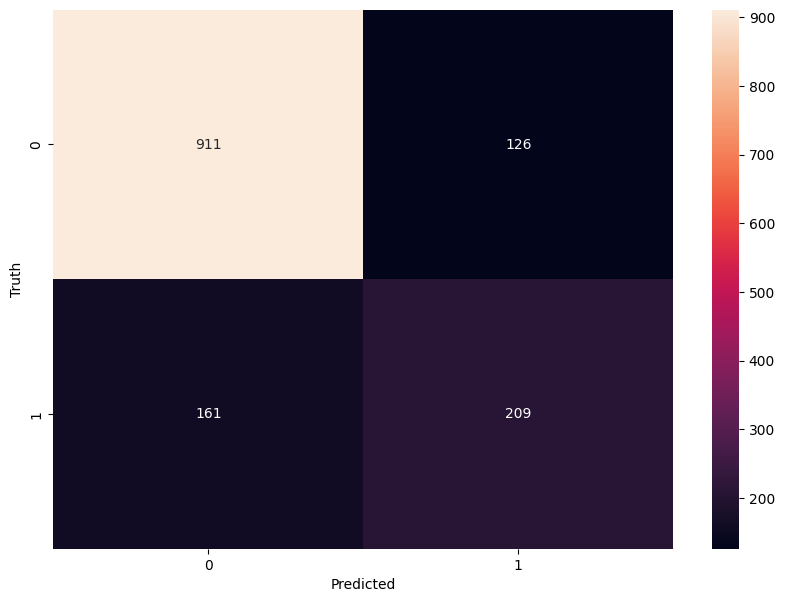

In [82]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=b_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [91]:

import pickle
with open('cx_churn_model.pickle','wb') as f:
    pickle.dump(ann,f)#model pickel file

In [92]:
from google.colab import files

In [94]:
files.download('cx_churn_model.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model with Dropout layer

In [100]:
ann2=keras.Sequential([
    keras.layers.Dense(600,input_shape=(26,),activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')

])
ann2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [101]:
ann2.fit(a_train,b_train,epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.6420 - loss: 0.6034
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7584 - loss: 0.4921
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7583 - loss: 0.4864
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7742 - loss: 0.4651
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7750 - loss: 0.4880
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7697 - loss: 0.4663
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7761 - loss: 0.4717
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7968 - loss: 0.4413
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7825 - loss: 0.4554
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7813 - loss: 0.4528
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7883 - loss: 0.4487
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━

In [102]:
ann2.evaluate(a_test,b_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8230 - loss: 0.4378


[0.4848392903804779, 0.8144989609718323]

In [105]:
pred2=ann2.predict(a_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [110]:
y_pred2 = []
for element in pred2:
    if element > 0.5:
        y_pred2.append(1)
    else:
        y_pred2.append(0)

In [112]:

print(classification_report(y_pred2,b_test))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1090
           1       0.58      0.67      0.62       317

    accuracy                           0.81      1407
   macro avg       0.74      0.76      0.75      1407
weighted avg       0.83      0.81      0.82      1407

